## Demo for modelling dual-channel PSF from bead data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
#gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='zernike',channeltype='2ch',sysfile='M2')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/2ch_40nm_bead/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'bead' # keyword for your data file
L.param.subfolder = 'bead' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1
L.param.ccd_offset = 400
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.05 # micron, equal to z_step*stepsize_of_the_data
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.max_bead_number = 100 
L.param.batch_size = 25 # lower this number if out of memory 
L.param.option.imaging.emission_wavelength = 0.68


##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,1): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

E:/EMBL files/data for PSF learning//example data for uiPSF/2ch_40nm_bead\Pos0_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1\Pos0_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_2_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning//example data for uiPSF/2ch_40nm_bead\Pos0_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_2\Pos0_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_2_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning//example data for uiPSF/2ch_40nm_bead\Pos10_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1\Pos10_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning//example data for uiPSF/2ch_40nm_bead\Pos11_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1\Pos11_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1_MMStack_Default.ome.tif
E:/EMBL files/data for PSF learning//example data for uiPSF/2ch_40nm_bead\Pos1_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_1\Pos1_bead4_tetraspec_50nmstep_triggerCam_10ms_SM_Z_2_

3/6: learning: 53/100 [00:22s]  2.38it/s, current loss: 0.54868, total time: 22.24s
3/6: learning: 54/100 [00:22s]  2.41it/s, current loss: 0.79523, total time: 44.66s
3/6: learning: 118/250 [01:41s]  1.16it/s, current loss: 1.40226, total time: 146.38s
4/6: calculating spline coefficients: 2/2 [00:04s]  2.26s/it total time: 150.89s
5/6: localization: 4/4 [00:31s]  7.96s/it total time: 182.73s


outlier id: [23 29 40 55 63 71 78 79 81]
rois shape channel 0: (74, 39, 25, 25)
rois shape channel 1: (74, 39, 25, 25)


3/6: learning: 97/250 [01:07s]  1.45it/s, current loss: 1.30487, total time: 249.82s 
4/6: calculating spline coefficients: 2/2 [00:04s]  2.20s/it total time: 254.20s
5/6: localization: 4/4 [00:23s]  5.87s/it total time: 277.67s
6/6: saving results: [00:09s] total time: 286.94s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


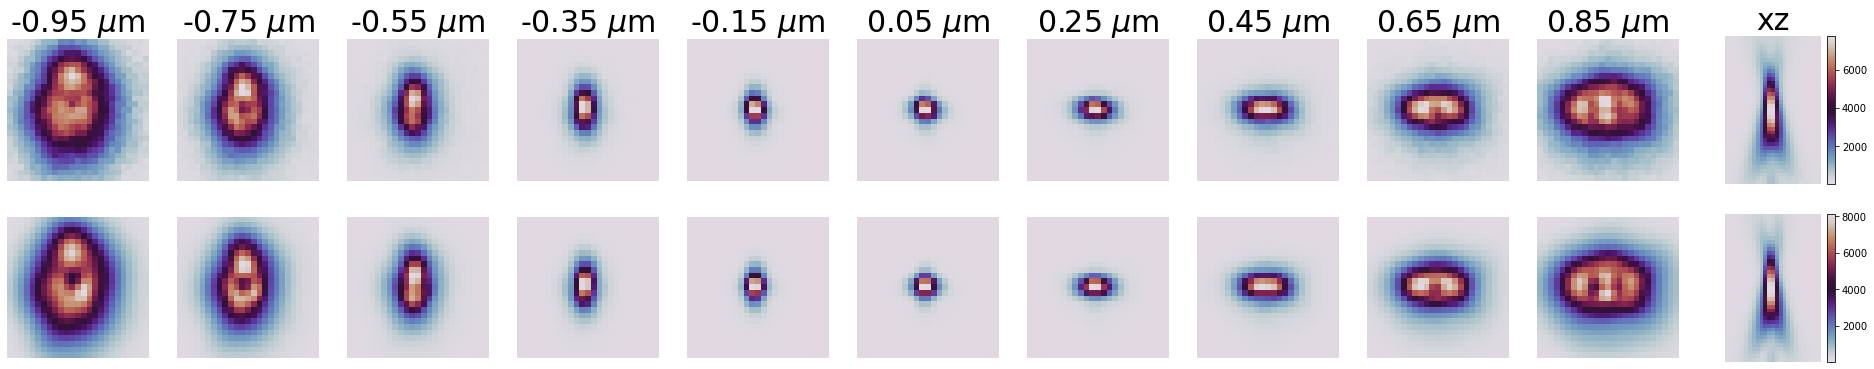

channel 1


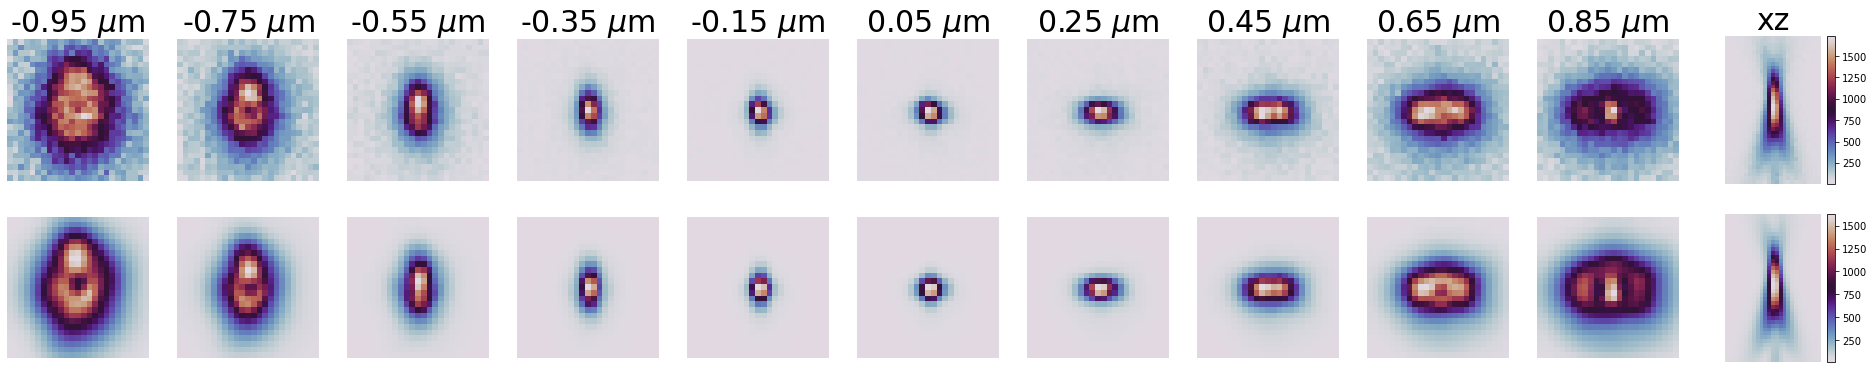

In [6]:
showpsfvsdata(f,p,index=0)

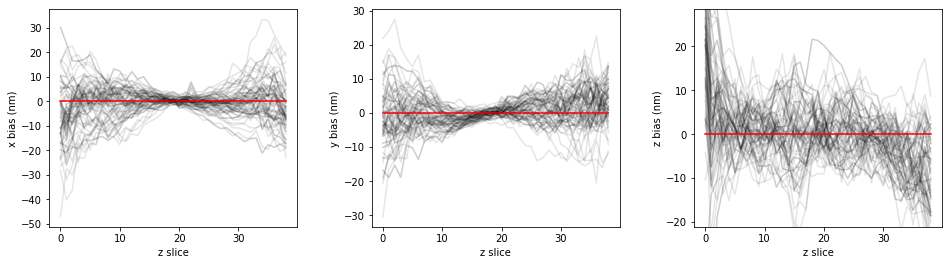

In [7]:
showlocalization(f,p)

##### Optional plots

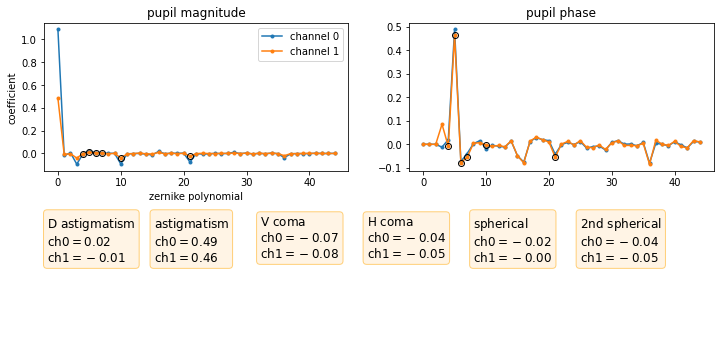

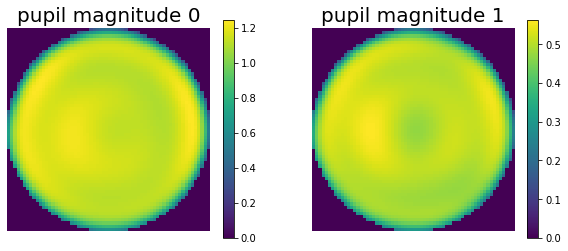

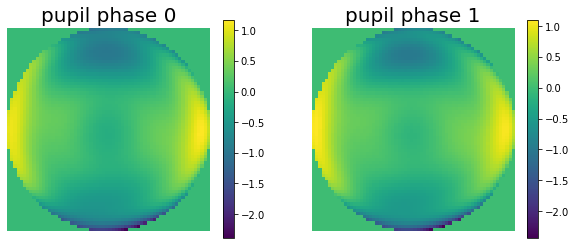

In [8]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

[[ 0.9998  0.0337  0.    ]
 [-0.034   0.9978 -0.    ]
 [-1.6944 34.9388  1.    ]]


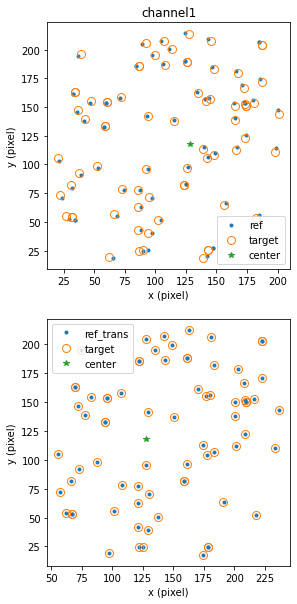

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

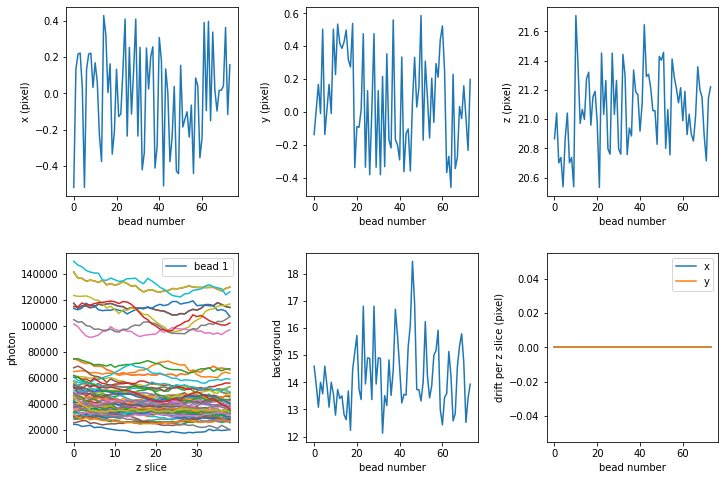

In [10]:
showlearnedparam(f,p)

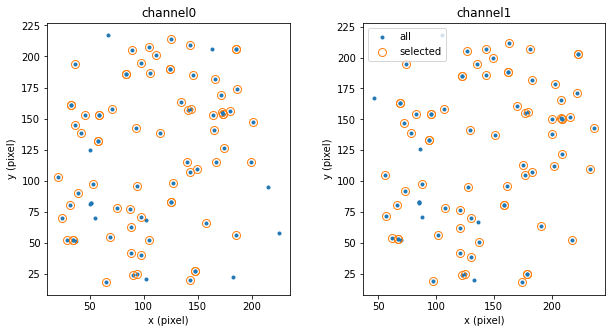

In [11]:
showcoord(f,p)

#### Ouput parameters

In [12]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
